In [112]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar, minimize, Bounds

In [88]:
@np.vectorize
def depreciation(initial, months):
    if months <= 12:
        return initial * 0.80 ** (months / 12)
    return initial * (0.85 ** (months / 12) - 0.05)

In [15]:
x = np.arange(0, 120)

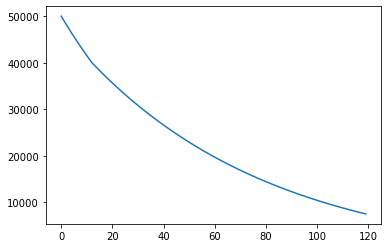

In [89]:
y = depreciation(50000, x)
plt.plot(x, y)

In [90]:
@np.vectorize
def loan(initial, payment, rate, months):
    if rate == 0:
        result = initial - payment * months
    else:
        result = initial * (1 + rate / 12) ** months - payment * ((1 + rate / 12) ** months - 1) / (rate / 12)
    return max(result, 0)

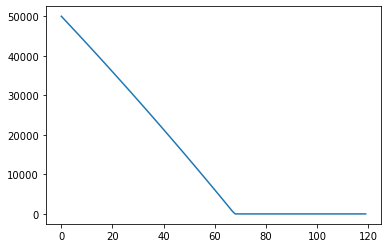

In [91]:
y = loan(50000, 792, 0.025, x)
plt.plot(x, y)

In [134]:
@np.vectorize
def payment_func(initial, rate, months):
    if rate == 0:
        return initial / months
    return initial * (1 + rate / 12) ** months / ((1 + rate / 12) ** months - 1) * (rate / 12)

In [97]:
payment_func(50000, 0.026, 72)

array(750.76939535)

In [98]:
@np.vectorize
def months_func(initial, payment, rate):
    if rate == 0:
        return initial / payment
    return np.log(payment / (rate / 12) / (initial - payment / (rate / 12))) / np.log(1 + rate / 12)

In [99]:
months_func(50000, 792, 0.25)

array(55.98809918)

In [100]:
@np.vectorize
def rate_func(initial, payment, months):
    def func(rate):
        return np.fabs(payment_func(initial, rate, months) - payment)
    return minimize_scalar(func, method='brent').x

In [101]:
rate_func(50000, 792, 72)

array(0.04425933)

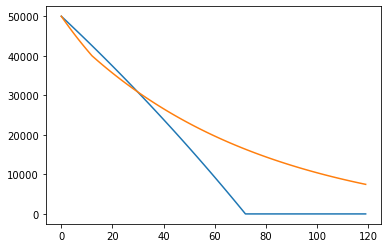

In [102]:
x = np.arange(0, 120)
loan_val = loan(50000, 792, 0.044259331828415176, x)
dep_val = depreciation(50000, x)
plt.plot(x, loan_val, dep_val)

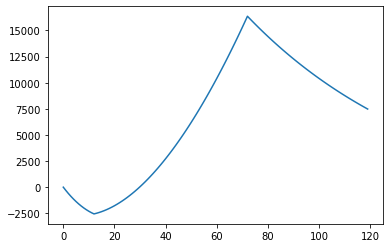

In [103]:
x = np.arange(0, 120)
y = depreciation(50000, x) - loan(50000, 792, 0.044259331828415176, x)
plt.plot(x, y)

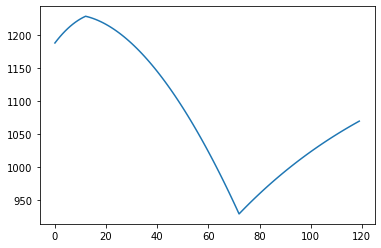

In [104]:
x = np.arange(0, 120)
excess = depreciation(50000, x) - loan(50000, 792, 0.044259331828415176, x)
pmt = payment_func(75000 - excess, 0.044259331828415176, 72)
plt.plot(x, pmt)

In [153]:
def pmt(down_pmt):
    print(80 * '*')
    print('down_pmt =', down_pmt)
    def pmt1(months, down_pmt):
        #print(80 * '-')
        #print('    months   =', months)
        #print('    down_pmt =', down_pmt)
        dep = depreciation(50000, months)
        #print('    value    =', dep)
        loan_bal = loan(50000, 792, 0.044259331828415176, months)
        #print('    balance  =', loan_bal)
        excess = dep - loan_bal
        #print('    excess   =', excess)
        result = payment_func(75000 - excess - down_pmt, 0.044259331828415176, 72)
        #print('    --> payment =', result)
        return result
    result = minimize_scalar(pmt1, args=(down_pmt,), bounds=(0, 120), method='bounded').x
    print('==> minimum month =', result)
    print('==> minimum payment =', pmt1(result, down_pmt))
    return result
minimize_scalar(pmt)

********************************************************************************
down_pmt = 0.0
==> minimum month = 72.00000000356498
==> minimum payment = 928.8975834851349
********************************************************************************
down_pmt = 1.0
==> minimum month = 72.00000000356536
==> minimum payment = 928.881743485139
********************************************************************************
down_pmt = -1.618034
==> minimum month = 72.00000000356523
==> minimum payment = 928.9232131436916
********************************************************************************
down_pmt = 0.0
==> minimum month = 72.00000000356498
==> minimum payment = 928.8975834851349
********************************************************************************
down_pmt = -0.618033974844
==> minimum month = 72.00000000356503
==> minimum payment = 928.907373143295
********************************************************************************
down_pmt = 0.381966
==> minimum m

     fun: 72.00000000356482
    nfev: 44
     nit: 40
 success: True
       x: 0.18033990644162096

In [167]:
COST = 75000
RATE = 0.045
def pmt(x):
    months, down_pmt = x
    return max(0, payment_func(COST - (depreciation(50000, months) - loan(50000, 792, RATE, months)) - down_pmt, RATE, 72))
minimize(pmt, (60, 10000), bounds=Bounds([0, 0], [120, COST]))

      fun: array(772.87136348)
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 3.35337728, -0.01586941])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 171
      nit: 7
     njev: 57
   status: 0
  success: True
        x: array([   72.17758806, 10000.03813773])